In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
# Allows to use Latex Code
plt.rcParams.update({
    "text.usetex": True
})

rng = np.random.default_rng()

n, alpha = 100, 0.05
samples = rng.normal(size = n)
eps = np.sqrt(np.log(2 / alpha)  / (2 * n))

F = lambda x : (sum(samples < x) / 100)
L = lambda x : np.maximum(F(x) - eps, 0)
U = lambda x : np.minimum(F(x) + eps, 1)
N = scipy.stats.norm.cdf

X = np.arange(start = -4, stop = 4, step = 0.1)
yF = np.vectorize(F)(X)
yL = np.vectorize(L)(X)
yU = np.vectorize(U)(X)
yN = np.vectorize(N)(X)

plt.plot(X, yL, label = "L(x)")
plt.plot(X, yF, label = r"$\hat{F}_n(x)$")
plt.plot(X, yU, label = "U(x)")
plt.plot(X, yN, linestyle='--', label = r"$\Phi(x)$")

plt.legend()
plt.legend(fontsize=14)

plt.savefig("Ex7_3.png", dpi = 300)
plt.show()

In [ ]:
k, count, count_cauchy = 1000, 0, 0
for i in range(k):
    samples = rng.normal(size = n)
    samples_cauchy = rng.standard_cauchy(size = n)

    F = lambda x : (sum(samples < x) / 100)
    F_cauchy = lambda x : (sum(samples_cauchy < x) / 100)
    L = lambda x : np.maximum(F(x) - eps, 0)
    U = lambda x : np.minimum(F(x) + eps, 1)

    C = scipy.stats.cauchy.cdf

    yF = np.vectorize(F)(X)
    yC = np.vectorize(C)(X)
    yL = np.vectorize(L)(X)
    yU = np.vectorize(U)(X)

    cmp = lambda x : (N(x) >= L(x) and N(x) <= U(x))
    cmp_cauchy = lambda x : (C(x) >= L(x) and C(x) <= U(x))
    contains = np.vectorize(cmp)(X)
    contains_cauchy = np.vectorize(cmp_cauchy)(X)
    if not contains.all():
        count += 1

    if not contains_cauchy.all():
        count_cauchy += 1

print(f"Normal : {count / k * 100:.2f}%")
print(f"Cauchy : {count_cauchy / k * 100:.2f}%")

In [ ]:
import pandas as pd

# Define the file path
file_path = "Data/fijiquakes.dat"

# Define the column names
column_names = ['Obs', 'lat', 'long', 'depth', 'mag', 'stations']

# Read the text file into a pandas DataFrame, skipping the first row
df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names, index_col=0, skiprows=1)

# Print the DataFrame
print(df)

In [ ]:
import numpy as np
import pandas as pd
import scipy

file_path = "Data/faithful.dat"

column_names = ['eruptions', 'waiting']
df = pd.DataFrame(columns=column_names)

with open(file_path, 'r') as file:
    next(file)  # Skips the header row
    for line in file:
        _, eruptions, waiting = line.strip().split()
        data_dict = {'eruptions': float(eruptions), 'waiting': int(waiting)}
        df = df.append(data_dict, ignore_index=True)


X = df["waiting"].values
n = len(X)
mu = np.mean(X)
variance = np.dot(X - mu, X - mu) / (2 * n)
sigma = np.sqrt(variance)

print(f"mu = {mu:.2f}\nse = {sigma:.2f}")

z = scipy.stats.norm.ppf(0.95)
left = mu - z * sigma
right = mu + z * sigma
print(f"(mu-z*se, mu+z*se) = ({left:.2f}, {right:.2f})")

In [ ]:
import matplotlib.pyplot as plt
y = X
x = range(len(X))
plt.scatter(x, y)

plt.axhline(y=left, color='r', linestyle='dotted')
plt.axhline(y=mu, color='r')
plt.axhline(y=right, color='r', linestyle='dotted')
plt.show()

In [ ]:
X
n = len(X)
T = np.median(X)
Tboot = []
for _ in range(1000):
    sample = np.random.choice(X, n, replace = True)
    Tboot.append(np.mean(sample))

se = np.sqrt(np.var(Tboot))
print(se)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Data/carmileage.dat"
column_names = ["Vol", "HP", "MPG", "SP", "WT"]
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names, skiprows=1, usecols=[1, 2, 3, 4, 5])

In [ ]:
X = df["HP"]
Y = df["MPG"]

alpha = -0.05
beta = 40

yreg = alpha * x + beta

plt.scatter(x, y)
plt.plot(x, yreg)

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotLine(x, y, color = "green", linestyle = "dotted"):
    plt.plot(x, y, color = color, linestyle = linestyle)

file_path = "Data/carmileage.dat"
column_names = ["Vol", "HP", "MPG", "SP", "WT"]
df = pd.read_csv(file_path,
                 sep='\t',
                 header=None,
                 names=column_names,
                 skiprows=1,
                 usecols=[1, 2, 3, 4, 5])

X, Y = df["HP"], df["MPG"]
n = len(X)

mu_X = np.mean(X)
mu_Y = np.mean(Y)
offsetNorm = np.dot(X - mu_X, X - mu_X)

beta1 = np.dot(X - mu_X, Y - mu_Y) / offsetNorm
beta0 = mu_Y - beta1 * mu_X

lineFunc = lambda x : beta0 + beta1 * x

x, y = [40, 350], [lineFunc(40), lineFunc(350)]

rss = np.dot(Y - lineFunc(X), Y - lineFunc(X))
var = rss / (len(X) - 2)
sigma = np.sqrt(var)

plt.scatter(X, Y)

plotLine(x, y, color = "red", linestyle = "-")

plotLine(x, y - sigma)
plotLine(x, y + sigma)
plotLine(x, y - 2 * sigma)
plotLine(x, y + 2 * sigma)

plt.xlabel("Horsepower")
plt.ylabel("Miles per gallon")

plt.savefig("Ex13_6.png")

plt.show()

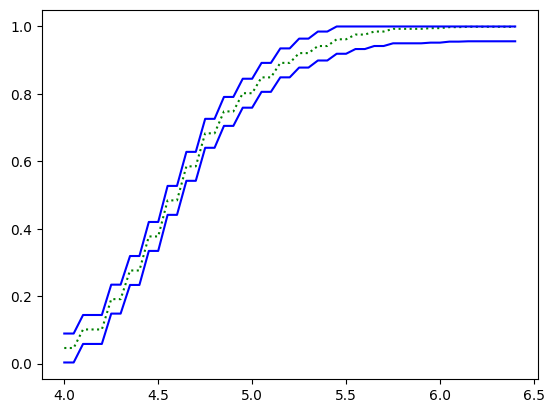

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Data/fijiquakes.dat"

magnitude = pd.read_csv(file_path,
                        sep=",",
                        names=["Magnitude"],
                        skiprows=1,
                        usecols=[4]).values.reshape(-1)

n = len(magnitude)
F = lambda x : np.sum(magnitude <= x) / n

alpha = 0.05
eps = np.sqrt(np.log(2 / alpha) / (2 * n))

L = lambda x : np.maximum(F(x) - eps, 0)
U = lambda x : np.minimum(F(x) + eps, 1)

x = np.arange(np.min(magnitude), np.max(magnitude), 0.05)
y = list(map(F, x))
y_L = list(map(L, x))
y_U = list(map(U, x))

plt.plot(x, y, color = "green", linestyle = "dotted")
plt.plot(x, y_L, color = "blue", linestyle = "-")
plt.plot(x, y_U, color = "blue", linestyle = "-")

plt.savefig("Ex7_7.png")

plt.show()